# model.ipynb
---
Look at `README.md` for more information.

IMPORTING THE NECESSARY MODULES
---

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

DEFINING INPUT FUNCTION
---

In [ ]:
def get_input_fn(data_df, label_df, *, nr_epochs=20,
                 shuffle=True, batch_size=32):
    def input_fn():
        data = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle: data = data.shuffle(1000)
        data = data.batch(batch_size).repeat(nr_epochs)
        return data
    return input_fn

GETTING DATA
---

In [ ]:
# https://xkcd.com/2582/

dftrain = pd.read_csv('./input_data.csv')
dfeval  = pd.read_csv('./test_data.csv')

# separate the training variables from the datasets
y_train = dftrain.pop('work')
y_eval  = dfeval.pop('work')

#print(dftrain.dtypes)
#print(dfeval.dtypes)


POPULATING FEATURE COLUMNS
---

In [ ]:
CATEGORICAL_COLUMNS = ["day_of_week"]
NUMERIC_COLUMNS    = [
    "month",
    "day",
    "holiday"
]

feature_columns = list()

for feature_name in CATEGORICAL_COLUMNS:
    vocab = dftrain[feature_name].unique()
    feature_columns.append(
        tf.feature_column.categorical_column_with_vocabulary_list(
            feature_name, vocab))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(
        tf.feature_column.numeric_column(
            feature_name, dtype=tf.float32))

MODEL INITIALIZATION, TRAINING, AND EVALUATING
---

In [8]:
train_input_fn = get_input_fn(dftrain, y_train, nr_epochs=1, shuffle=True)
eval_input_fn  = get_input_fn(dfeval, y_eval, nr_epochs=1, shuffle=False)

# using rudimentary linear regression model in tensorflow
model = tf.estimator.LinearClassifier(
    feature_columns=feature_columns
)

loss_by_epoch   = list()
current_loss    = 1.0
acceptable_loss = 0.4

while current_loss > acceptable_loss:
    model.train(train_input_fn)
    result = model.evaluate(eval_input_fn)
    current_loss = result['loss']
    loss_by_epoch.append(current_loss)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpiwy4s8uk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

VISUALIZING DATA
---

### LOSS BY EPOCH

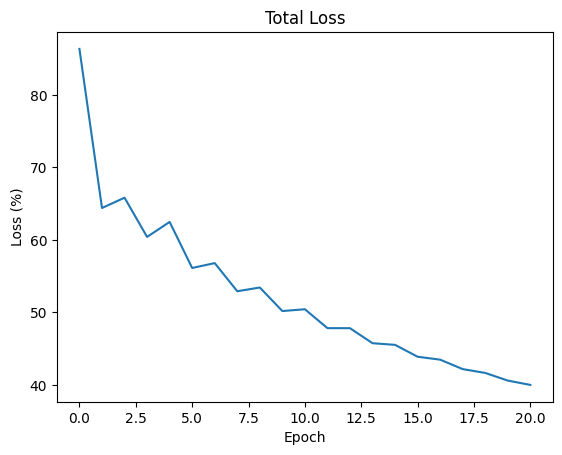

In [13]:
#print(loss_by_epoch)

import matplotlib.pyplot as plt

y = [i * 100 for i in loss_by_epoch]
x = range(0, len(loss_by_epoch))

plt.plot(x,y)
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (%)')
plt.show()
#plt.savefig('./assets/asset1.png', bbox_inches='tight')


In [10]:
print(result)

{'accuracy': 1.0, 'accuracy_baseline': 0.5, 'auc': 1.0, 'auc_precision_recall': 1.0, 'average_loss': 0.39996004, 'label/mean': 0.5, 'loss': 0.39996004, 'precision': 1.0, 'prediction/mean': 0.44311932, 'recall': 1.0, 'global_step': 21}
